In [1]:
%matplotlib notebook

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
from itertools import cycle, islice


In [3]:
df = pd.read_csv("../flight-delays/flights.csv")
df.head()

C:\Users\sters\Anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df["total_delay"] = df["DEPARTURE_DELAY"]
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,total_delay
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,-11.0
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,-8.0
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,-2.0
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,-5.0
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,-1.0


In [5]:
grouped_df = df.groupby(["AIRLINE"]+ ["total_delay"])
grouped_df

In [6]:
airline_delay = df[["AIRLINE","DEPARTURE_DELAY"]]
airline_delay

,AIRLINE,DEPARTURE_DELAY
0,AS,-11.0
1,AA,-8.0
2,US,-2.0
3,AA,-5.0
4,AS,-1.0
5,DL,-5.0
6,NK,-6.0
7,US,14.0
8,AA,-11.0
9,DL,3.0


In [7]:
df_airline_total = airline_delay["AIRLINE"].value_counts()

In [8]:
df_airline_clean = airline_delay[airline_delay["DEPARTURE_DELAY"] >= 15.0]
airline_count = df_airline_clean["AIRLINE"].value_counts()
airline_count

WN    265443
AA    123739
DL    123364
UA    120591
EV     96997
OO     96592
B6     57691
MQ     56293
NK     31602
US     29144
F9     20781
AS     18703
VX     11029
HA      5585
Name: AIRLINE, dtype: int64

In [9]:
comparison_df = pd.DataFrame(airline_count)
comparison_df["Total Flights"] = df_airline_total
comparison_df["Delayed Percentage %"] = comparison_df["AIRLINE"]/comparison_df["Total Flights"]
comparison_df= comparison_df.rename(columns={"AIRLINE":"Delayed Flights"})
comparison_df

,Delayed Flights,Total Flights,Delayed Percentage %
WN,265443,1261855,0.210359
AA,123739,725984,0.170443
DL,123364,875881,0.140846
UA,120591,515723,0.233829
EV,96997,571977,0.169582
OO,96592,588353,0.164174
B6,57691,267048,0.216032
MQ,56293,294632,0.191062
NK,31602,117379,0.269230
US,29144,198715,0.146662


<IPython.core.display.Javascript object>


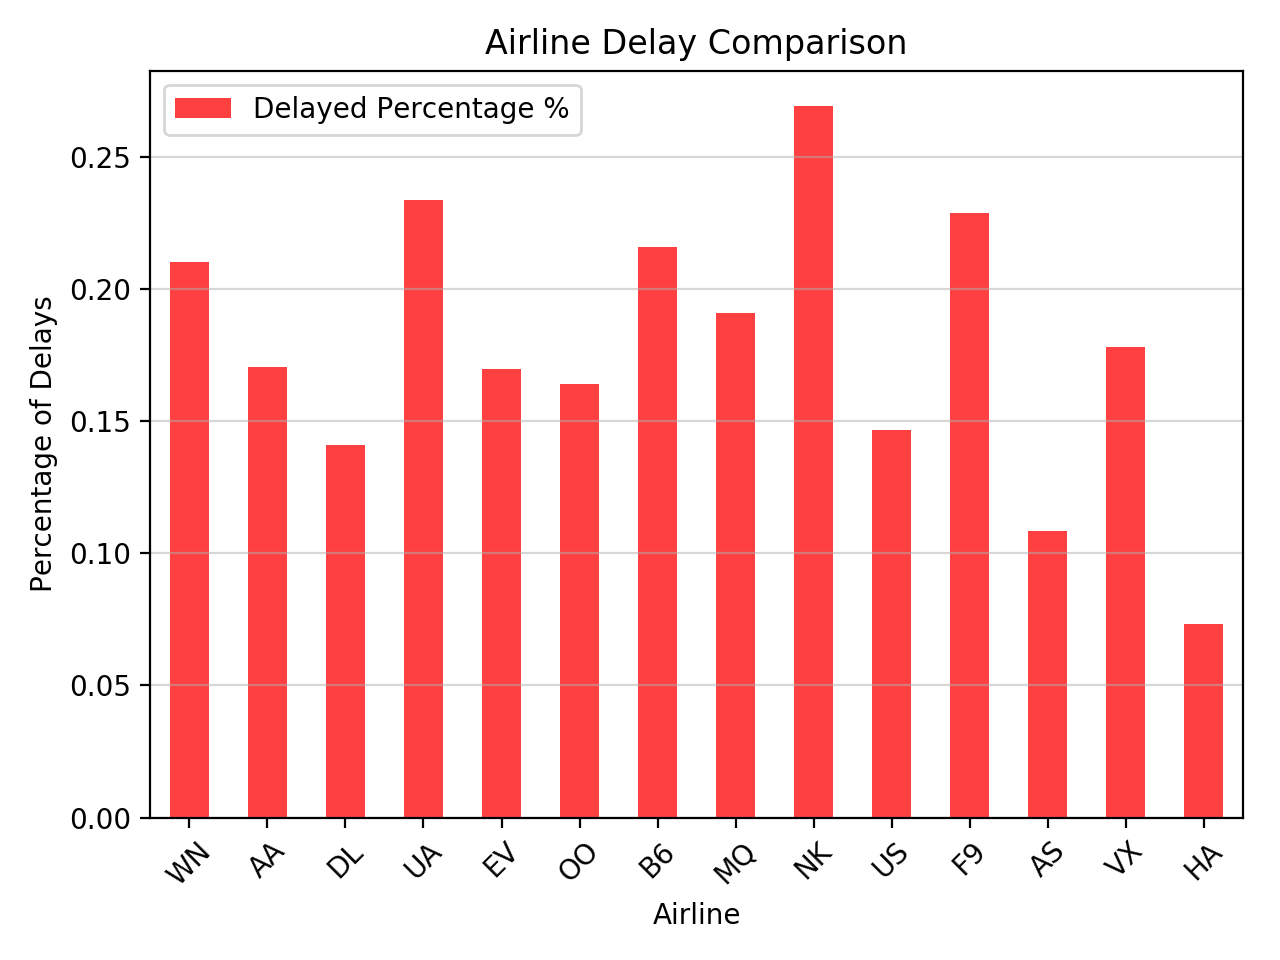

In [10]:
comparison_df.plot(y = "Delayed Percentage %", kind="bar", facecolor="red", alpha=0.75, align="center", rot=45)
plt.title("Airline Delay Comparison")
plt.xlabel("Airline")
plt.ylabel("Percentage of Delays")
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.savefig("AirlineDelays")
plt.show()

In [11]:
comparison_df = comparison_df.drop(columns=["Delayed Percentage %"])
comparison_df

,Delayed Flights,Total Flights
WN,265443,1261855
AA,123739,725984
DL,123364,875881
UA,120591,515723
EV,96997,571977
OO,96592,588353
B6,57691,267048
MQ,56293,294632
NK,31602,117379
US,29144,198715


<IPython.core.display.Javascript object>


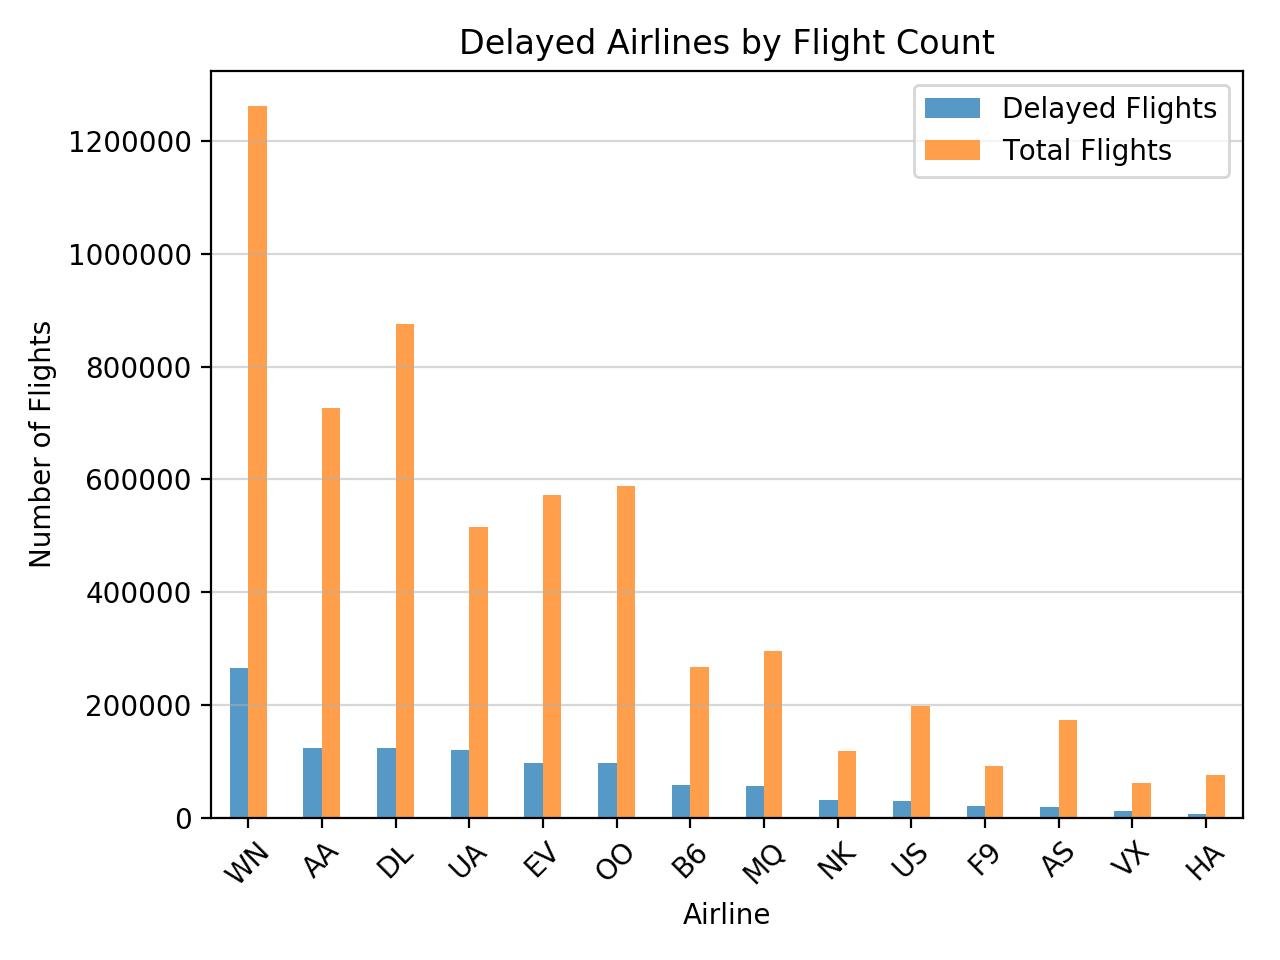

In [13]:
comparison_df.plot(kind="bar", alpha=0.75, align="center", rot=45)
plt.title("Delayed Airlines by Flight Count")
plt.xlabel("Airline")
plt.ylabel("Number of Flights")
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.savefig("AirlineDelaysCount")
plt.show()